In [1]:
from tensorflow import keras
from Skripsi import Preprocessing
from Skripsi import Evaluation
from Skripsi import LSTMUnit
from Skripsi2 import Preprocessing as Preprocessing1
from pandas import read_csv
from pandas import DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
btc_dfd = pd.read_csv('../Dataset/Binance_BTCUSDT_1h.csv')
eth_dfd = pd.read_csv('../Dataset/Binance_ETHUSDT_1h.csv')
ltc_dfd = pd.read_csv('../Dataset/Binance_LTCUSDT_1h.csv')

In [3]:
btc_dfd

,Date,Open,High,Low,Close,Volume USDT
0,2022-12-31 23:00:00,16520.28,16551.24,16487.74,16542.40,8.217183e+07
1,2022-12-31 22:00:00,16548.28,16567.49,16470.00,16520.81,1.106669e+08
2,2022-12-31 21:00:00,16568.19,16571.64,16544.12,16548.28,5.992803e+07
3,2022-12-31 20:00:00,16570.14,16574.97,16564.09,16568.60,4.344849e+07
4,2022-12-31 19:00:00,16577.78,16590.06,16565.10,16570.14,6.704605e+07
...,...,...,...,...,...,...
26269,2020-01-01 04:00:00,7225.00,7230.00,7215.03,7217.27,3.379094e+06
26270,2020-01-01 03:00:00,7242.66,7245.00,7220.00,7225.01,5.667367e+06
26271,2020-01-01 02:00:00,7215.52,7244.87,7211.41,7242.85,4.736719e+06
26272,2020-01-01 01:00:00,7176.47,7230.00,7175.71,7216.27,6.365953e+06


In [4]:
df1 = Preprocessing.sort_df(btc_dfd)
df2 = Preprocessing.sort_df(eth_dfd)
df3 = Preprocessing.sort_df(ltc_dfd)

In [5]:
btc_dfd['Date'] = pd.to_datetime(btc_dfd['Date'], format='%Y-%m-%d %H:%M:%S')
eth_dfd['Date'] = pd.to_datetime(eth_dfd['Date'], format='%Y-%m-%d %H:%M:%S')
ltc_dfd['Date'] = pd.to_datetime(ltc_dfd['Date'], format='%Y-%m-%d %H:%M:%S')

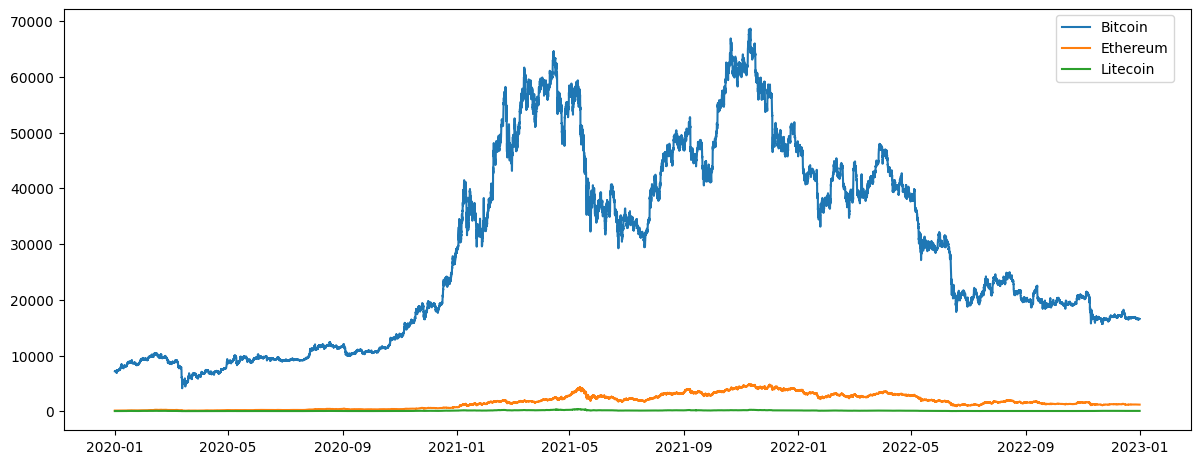

In [6]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
# fig.set_figheight(16)
fig.tight_layout()

ax.plot(btc_dfd['Date'], btc_dfd['Close'], label='Bitcoin')
ax.plot(btc_dfd['Date'], eth_dfd['Close'], label='Ethereum')
ax.plot(btc_dfd['Date'], ltc_dfd['Close'], label='Litecoin')
fig.legend(loc='upper right', bbox_to_anchor=(0.97, 0.96))
fig.savefig('../../Skripsi/img/dataCompare.png', dpi=300, bbox_inches='tight')

In [7]:
btc_dfd.describe()

,Open,High,Low,Close,Volume USDT
count,26274.000000,26274.000000,26274.000000,26274.000000,2.627400e+04
mean,28869.786755,29029.830660,28700.003657,28870.141973,1.004874e+08
std,17100.619082,17201.628393,16993.453320,17100.267051,1.055760e+08
min,4131.230000,4610.000000,3782.130000,4130.640000,0.000000e+00
25%,11622.547500,11657.347500,11582.197500,11625.672500,3.086883e+07
50%,23681.425000,23812.125000,23527.350000,23681.430000,7.136670e+07
75%,42985.690000,43203.022500,42750.820000,42985.685000,1.329251e+08
max,68635.120000,69000.000000,68451.190000,68633.690000,3.005634e+09


In [8]:
eth_dfd.describe()

,Open,High,Low,Close,Volume USDT
count,26274.000000,26274.000000,26274.000000,26274.000000,2.627400e+04
mean,1688.011345,1699.539474,1675.649747,1688.050794,5.091087e+07
std,1271.648137,1279.648433,1262.996271,1271.615771,6.108698e+07
min,96.510000,105.690000,86.000000,96.620000,0.000000e+00
25%,388.502500,390.940000,386.395000,388.547500,1.161499e+07
50%,1541.175000,1552.415000,1526.995000,1541.170000,3.496242e+07
75%,2695.570000,2720.822500,2673.530000,2695.587500,6.611962e+07
max,4846.940000,4868.000000,4833.190000,4846.710000,1.170476e+09


In [9]:
ltc_dfd.describe()

,Open,High,Low,Close,Volume USDT
count,26274.000000,26274.000000,26274.000000,26274.000000,2.627400e+04
mean,107.193523,108.116878,106.206410,107.194251,4.801439e+06
std,65.853714,66.645709,65.005763,65.852550,9.059537e+06
min,25.240000,29.450000,24.000000,25.240000,0.000000e+00
25%,53.980000,54.350000,53.600000,53.982500,9.248384e+05
50%,76.950000,77.430000,76.455000,76.955000,2.061306e+06
75%,151.627500,153.100000,150.345000,151.615000,4.997416e+06
max,409.830000,413.490000,402.800000,409.840000,4.274019e+08


In [10]:
x1, scaler = Preprocessing.minmax_scale(df1)
x2, scaler = Preprocessing.minmax_scale(df2)
x3, scaler = Preprocessing.minmax_scale(df3)

In [11]:
x1

array([[0.04750117, 0.0401654 , 0.05247223, 0.00122299, 0.04722846],
       [0.04721018, 0.04068955, 0.0524761 , 0.00211801, 0.04783696],
       [0.04781557, 0.04092048, 0.05302814, 0.00157595, 0.04824904],
       ...,
       [0.19280946, 0.1857686 , 0.19734306, 0.01993857, 0.19251245],
       [0.19250079, 0.18570415, 0.19619691, 0.03681983, 0.19208658],
       [0.19206671, 0.18545178, 0.19647123, 0.02733927, 0.19242129]])

In [12]:
x2

array([[0.00687306, 0.00493458, 0.00899058, 0.00085515, 0.00678935],
       [0.00681201, 0.00524115, 0.00901165, 0.00125955, 0.00716197],
       [0.00718251, 0.00531045, 0.00934237, 0.00084925, 0.00720618],
       ...,
       [0.23278314, 0.23041549, 0.23462933, 0.00396711, 0.23230718],
       [0.2323116 , 0.23001863, 0.23320743, 0.00977339, 0.23148404],
       [0.23148852, 0.22924589, 0.23331697, 0.00605456, 0.2314714 ]])

In [13]:
x3

array([[0.04173275, 0.03083012, 0.04530095, 0.00027277, 0.04170567],
       [0.04170675, 0.03189772, 0.04559134, 0.00066231, 0.0425897 ],
       [0.04261681, 0.03236642, 0.04651531, 0.0005622 , 0.04318773],
       ...,
       [0.11742375, 0.10675971, 0.1219377 , 0.00159586, 0.11697868],
       [0.11700772, 0.10621289, 0.12067054, 0.00206794, 0.11661466],
       [0.1165917 , 0.10636913, 0.12088173, 0.00221959, 0.11674467]])

In [14]:
btc = [row[4] for row in x1]
eth = [row[4] for row in x2]
ltc = [row[4] for row in x3]

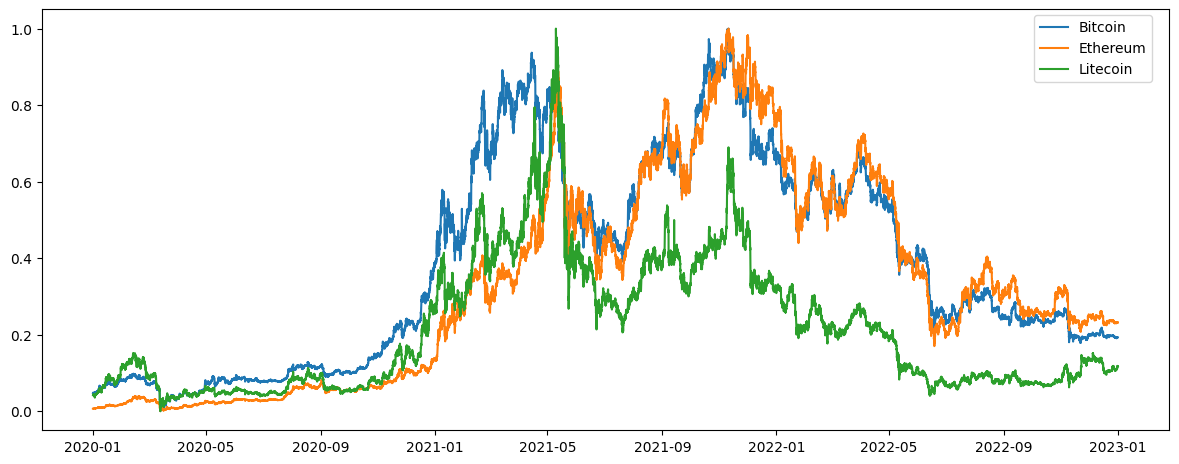

In [15]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
# fig.set_figheight(16)
fig.tight_layout()

ax.plot(btc_dfd['Date'].iloc[::-1], btc, label='Bitcoin')
ax.plot(btc_dfd['Date'].iloc[::-1], eth, label='Ethereum')
ax.plot(btc_dfd['Date'].iloc[::-1], ltc, label='Litecoin')
fig.legend(loc='upper right', bbox_to_anchor=(0.97, 0.96))
fig.savefig('../../Skripsi/img/dataCompare.png', dpi=300, bbox_inches='tight')

In [16]:
type(btc)

list

In [17]:
df_all = pd.DataFrame({'BTC': btc, 'ETH': eth, 'LTC': ltc})

In [18]:
df_all

,BTC,ETH,LTC
0,0.047228,0.006789,0.041706
1,0.047837,0.007162,0.042590
2,0.048249,0.007206,0.043188
3,0.047972,0.007069,0.042356
4,0.047852,0.007069,0.042512
...,...,...,...
26269,0.192851,0.232844,0.116771
26270,0.192827,0.232779,0.117395
26271,0.192512,0.232307,0.116979
26272,0.192087,0.231484,0.116615


In [19]:
df_all.describe()

,BTC,ETH,LTC
count,26274.000000,26274.000000,26274.000000
mean,0.383540,0.335032,0.213090
std,0.265108,0.267704,0.171223
min,0.000000,0.000000,0.000000
25%,0.116197,0.061457,0.074733
50%,0.303099,0.304110,0.134464
75%,0.602375,0.547141,0.328588
max,1.000000,1.000000,1.000000


In [22]:
kv_btc = df_all.BTC.std()/df_all.BTC.mean()*100
kv_btc

69.12130676499572

In [23]:
kv_eth = df_all.ETH.std()/df_all.ETH.mean()*100
kv_eth

79.90393148592642

In [24]:
kv_ltc = df_all.LTC.std()/df_all.LTC.mean()*100
kv_ltc

80.35281734936424